# Comparing methods of feature engineering through detecting the anomalous activity of a ship’s engine

<br></br>

## **Business context**
We are provided with a real data set to identify anomalous activity in a ship’s engine functionality (Devabrat,  2022). Typically speaking, anomalies would make up a minority of the data points (i.e., about 1% to 5% of the data points would be anomalies).

The data set contains six important features continuously monitored to evaluate the engine's status as ‘good’ or ‘bad’. These features are:
- **Engine rpm (revolutions per minute):** A high rpm indicates the engine is operating at a higher speed than designed for prolonged periods, which can lead to overheating, excessive wear, and eventual failure. A low rpm could signal a lack of power, issues with fuel delivery, or internal mechanical problems.
- **Lubrication oil pressure:** Low lubrication oil pressure indicates insufficient lubrication, leading to increased friction, overheating, and engine damage. A high lubrication oil pressure could signal a blockage in the oil delivery system, potentially causing seal or gasket failure.
- **Fuel pressure:** High fuel pressure can cause poor engine performance and incomplete combustion, indicating fuel pump or filter issues. A low fuel pressure may result in excessive fuel consumption, poor emissions, or damage to the fuel injectors.
- **Coolant pressure:** Low coolant pressure indicates a potential leak in the cooling system or a coolant pump failure, risking engine overheating. A high coolant pressure could be a sign of a blockage in the cooling system or a failing head gasket, which can also lead to overheating.
- **Lubrication oil temperature:** High lubrication oil temperature suggests the oil is overheating, which can degrade its lubricating properties and lead to engine damage. A low lubrication oil temperature may indicate it is not reaching its optimal operating temperature, potentially causing inadequate lubrication.
- **Coolant temperature:** High coolant temperature signals overheating, which various issues, including a failed thermostat, coolant leak, or insufficient coolant flow can cause. A low coolant temperature could suggest the engine is not reaching its optimal operating temperature, affecting performance and efficiency.

Issues with engines could lead to engine malfunctions, potential safety hazards, and downtime (e.g. delayed deliveries), resulting in the breakdown of a ship’s overall functionality, consequently impacting the business, such as affecting revenue via failure to deliver goods. By predicting timely maintenance, the business aims to increase profit by reducing downtime, reducing safety risks for the crew, limiting fuel consumption, and increasing customer satisfaction through timely deliveries.

The task is to develop a robust anomaly detection system to protect a company’s shipping fleet by evaluating engine functionality. Along side this we will compare the effectiveness of simple feature engineering, taking ratios, and feature discovery using symbolic regression.

We will explore some statistical methods and unsupervised ML methods for anomalie detection, intepret the effectiveness of each whilst copmaring thier effect on three different feature sets.

## **Methods Used:**
- **Z-Score**
- **BoxPlots**
- **IQR**
- **One Class SVM**
- **IsolationForest**
<br></br>

## **Comparions Made Using:**
- **PCA**
- **UMAP**
- **Mean Separation Distance**
<br></br>

## Data Import and Initial Inspection

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# URL to import data set from GitHub.
url = 'https://raw.githubusercontent.com/fourthrevlxd/cam_dsb/main/engine.csv'

In [4]:
# Create a pandas dataframe and inspect the first few rows
df = pd.read_csv(url)
df.head()

Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
0         682          2.391656       4.617196          2.848982   
1         605          5.466877       6.424361          5.727520   
2         658          3.434232       3.680896          1.678708   
3         749          2.094656       7.120927          1.639670   
4         676          3.538228       5.956472          3.225336   

   lub oil temp  Coolant temp  
0     76.272417     69.884609  
1     73.222679     74.907314  
2     88.089916     78.704806  
3     77.661625     82.386700  
4     75.226352     67.153220

In [5]:
# Inspecting a few statistics of the data: mean, std, min and max
df.describe()

Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
count  19535.000000      19535.000000   19535.000000      19535.000000   
mean     791.239263          3.303775       6.655615          2.335369   
std      267.611193          1.021643       2.761021          1.036382   
min       61.000000          0.003384       0.003187          0.002483   
25%      593.000000          2.518815       4.916886          1.600466   
50%      746.000000          3.162035       6.201720          2.166883   
75%      934.000000          4.055272       7.744973          2.848840   
max     2239.000000          7.265566      21.138326          7.478505   

       lub oil temp  Coolant temp  
count  19535.000000  19535.000000  
mean      77.643420     78.427433  
std        3.110984      6.206749  
min       71.321974     61.673325  
25%       75.725990     73.895421  
50%       76.817350     78.346662  
75%       78.071691     82.915411  
max       89.580796    195.527912

Each column has 19535 entires, there are no negative values, max value for some columns are significantly higher than the min, but no inf values it seems.

In [6]:
# Now inpecting data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine rpm        19535 non-null  int64  
 1   Lub oil pressure  19535 non-null  float64
 2   Fuel pressure     19535 non-null  float64
 3   Coolant pressure  19535 non-null  float64
 4   lub oil temp      19535 non-null  float64
 5   Coolant temp      19535 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 915.8 KB


All observations are numerical.

In [7]:
# And NA/NaN values
(df.isna()).sum()

Engine rpm          0
Lub oil pressure    0
Fuel pressure       0
Coolant pressure    0
lub oil temp        0
Coolant temp        0
dtype: int64

No missing data.

In [8]:
df.duplicated().any()

False

No duplicated rows present.

In [9]:
# Create variabe assigned to the number of observations
rows_number = df.shape[0]

## Exploratory Data Analysis

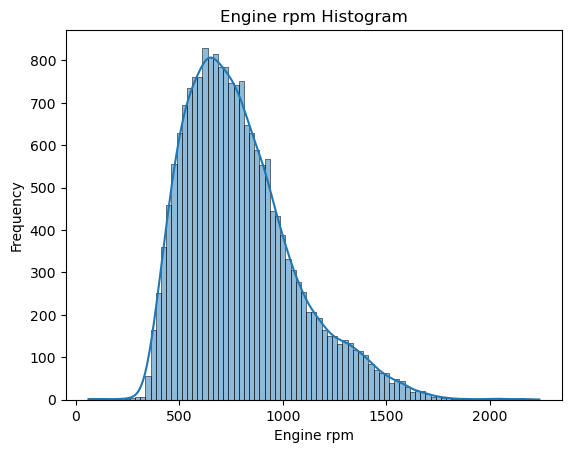

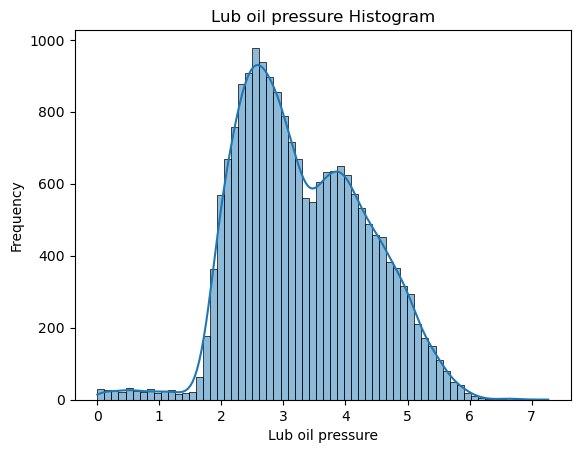

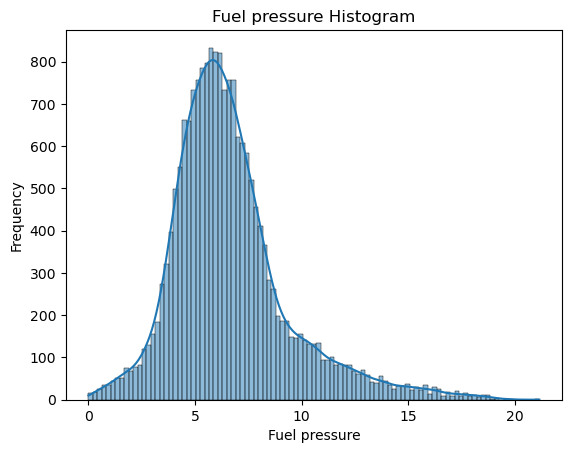

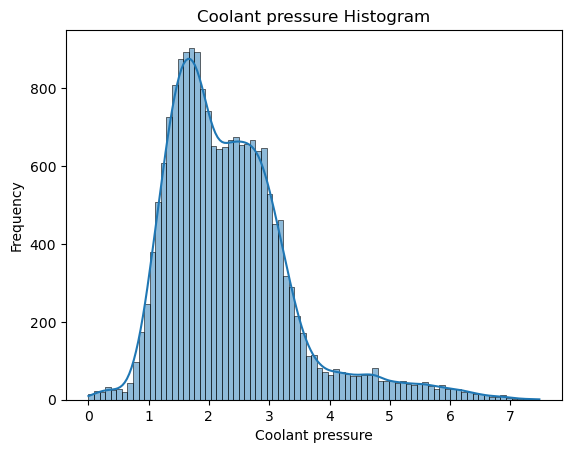

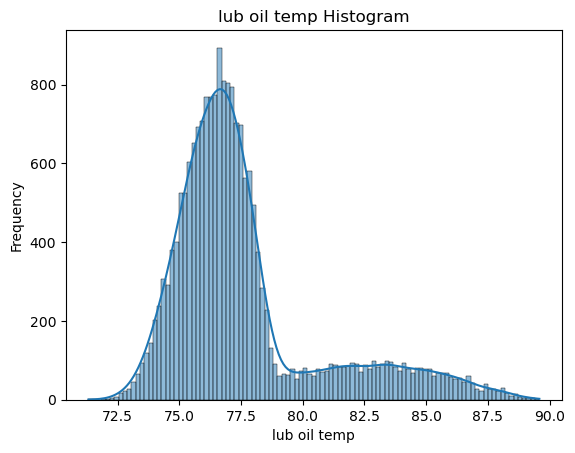

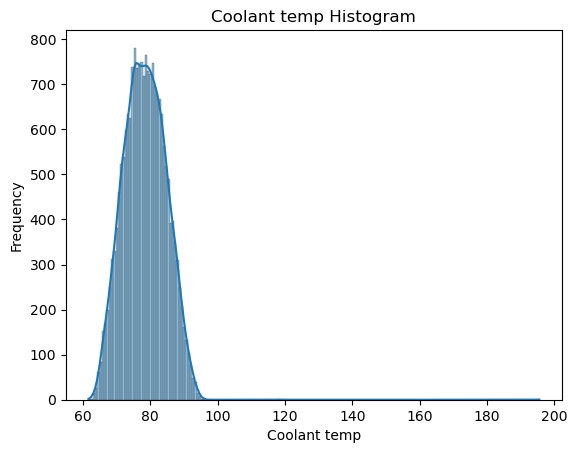

In [10]:
# Inpecting the distribution of each column
for col in df.columns:
    sns.histplot(df[col], kde=True)
    plt.title(f'{col} Histogram')
    plt.xlabel(f'{col}')
    plt.ylabel('Frequency')
    plt.show()

The histograms reveal we are working with non-gaussian distributed data.

Pair Plot for the Complete Dataframe


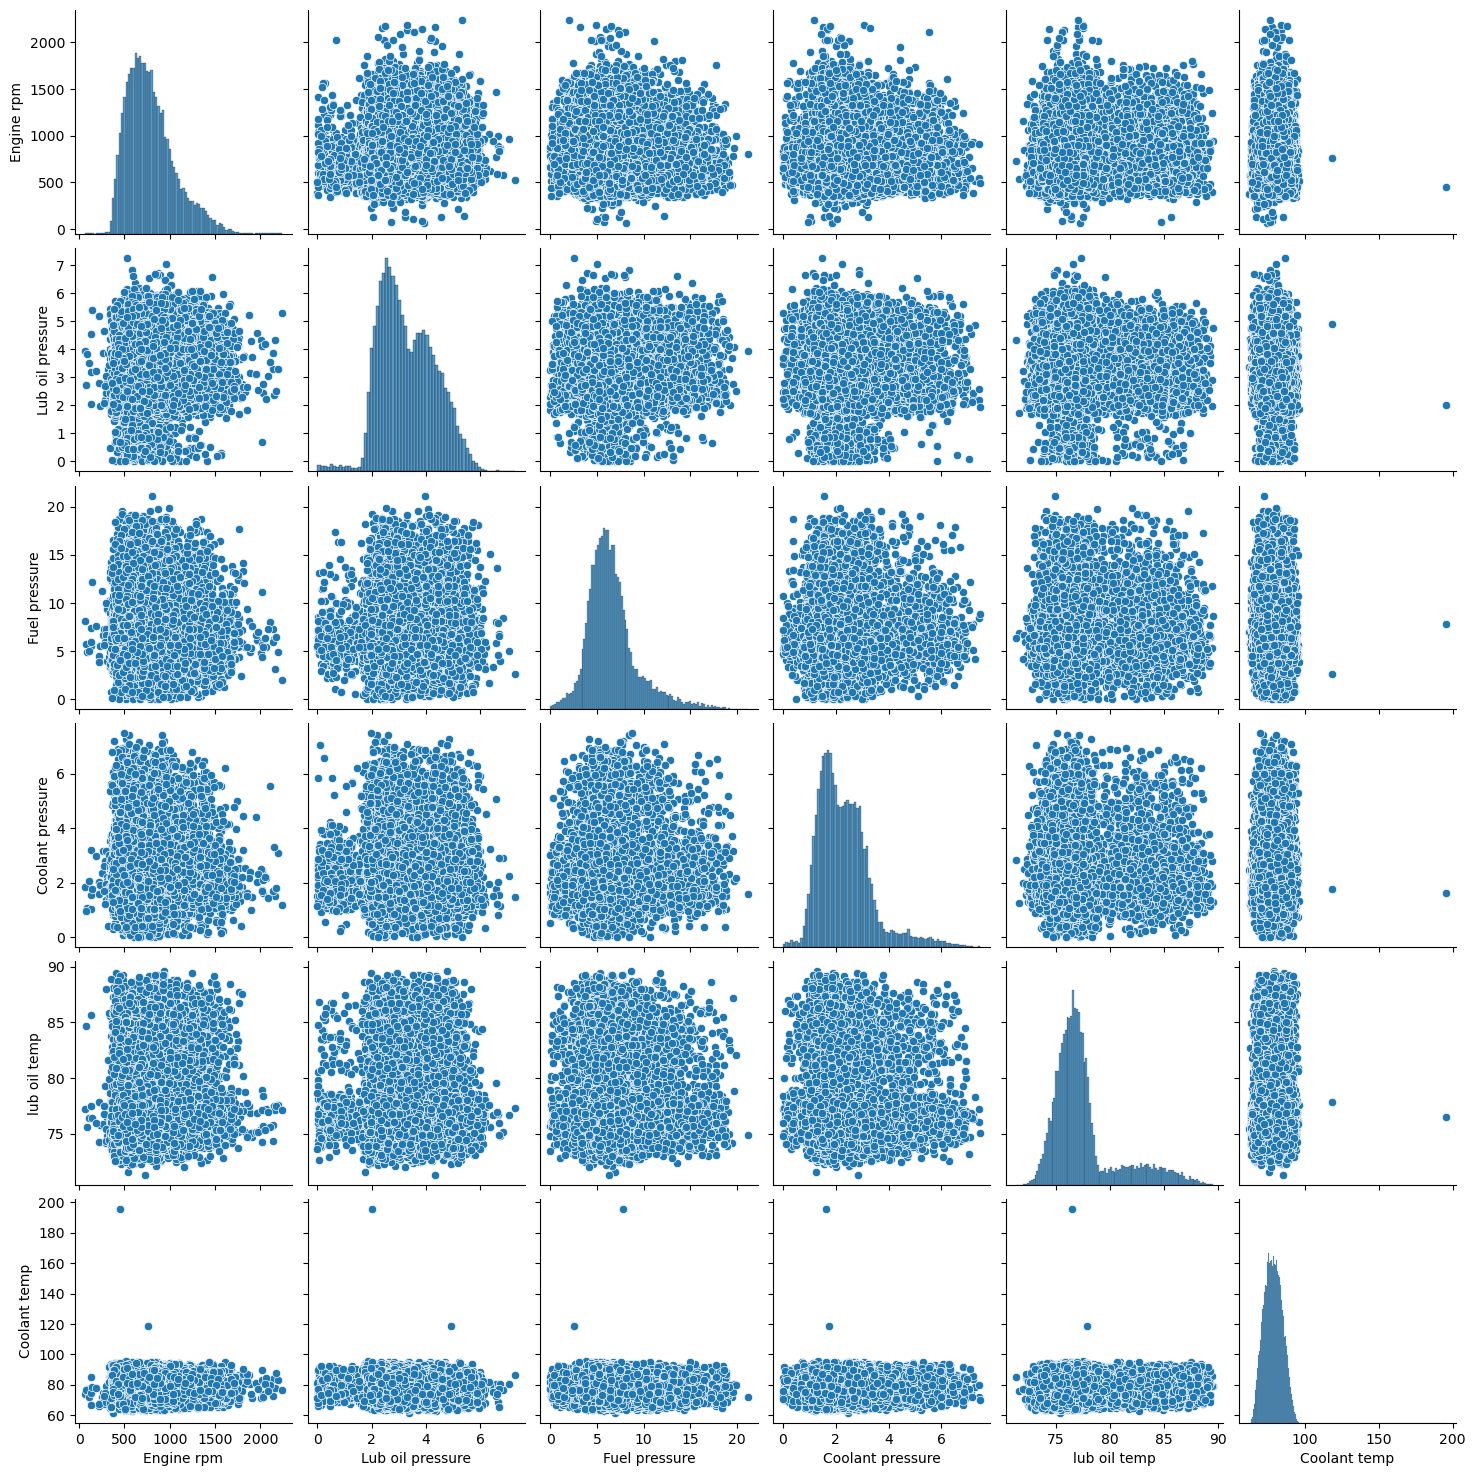

In [12]:
# Inpecting relationships and corrolations between variables

sns.pairplot(df)
print('Pair Plot for the Complete Dataframe')
plt.show()

The scatter plots do not reveal anys strong relationships.

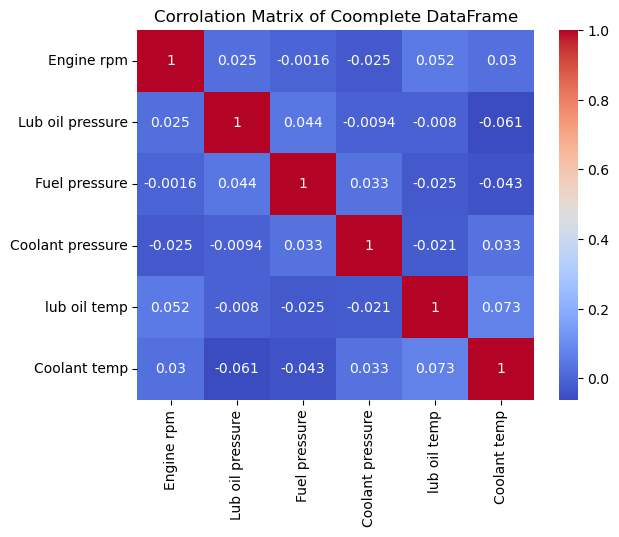

In [13]:
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Corrolation Matrix of Coomplete DataFrame')
plt.show()

The corrolation matrix additionally indicates no strong corrolation between variables.

## Boxplot Analysis

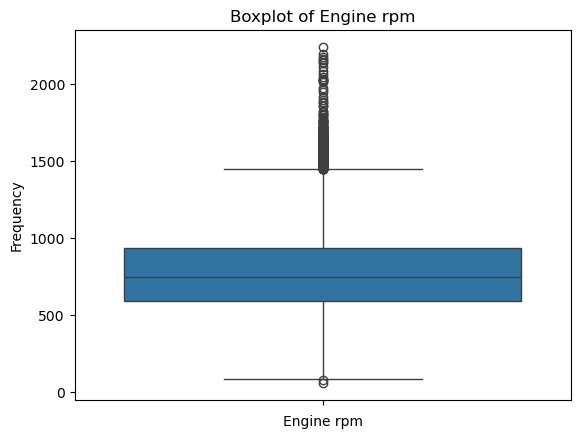

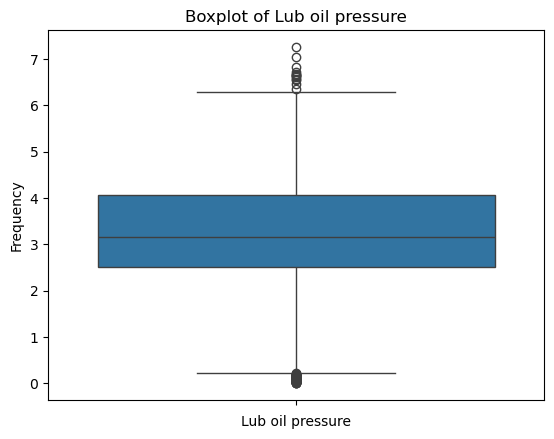

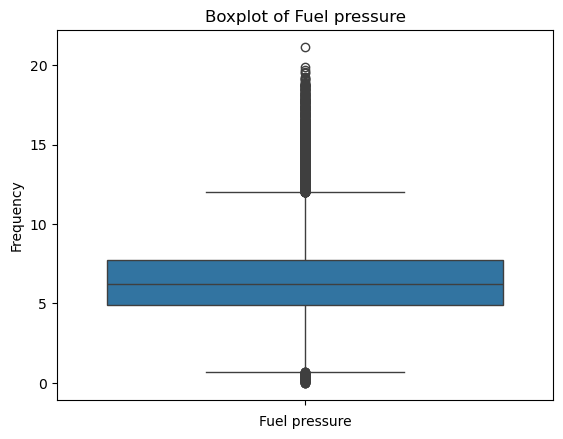

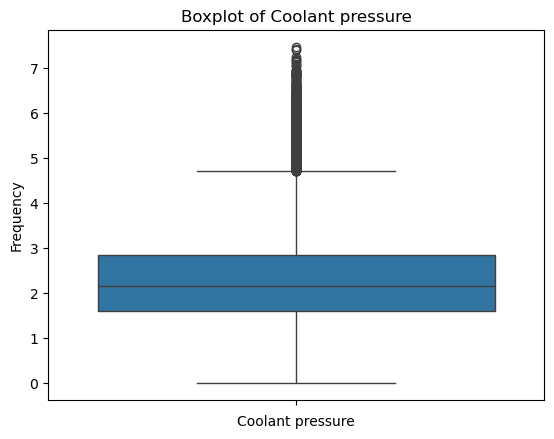

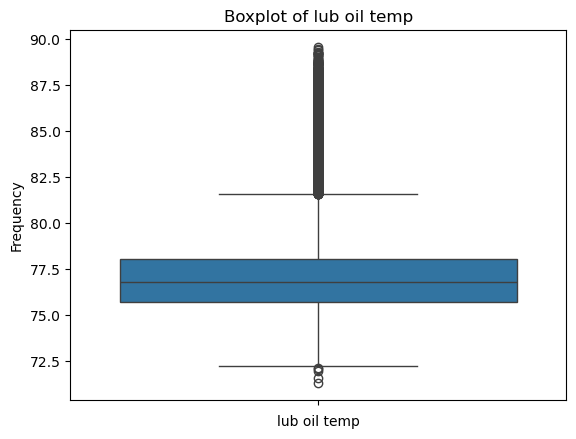

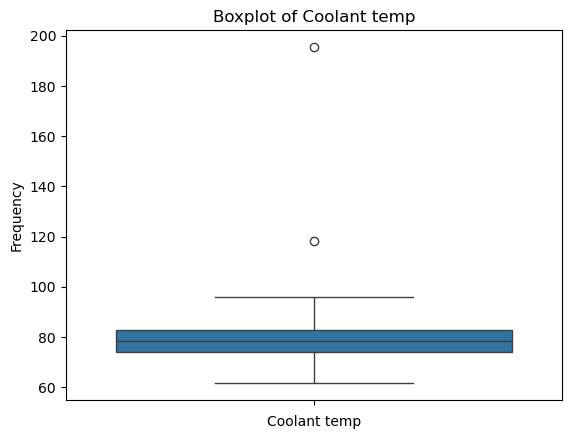

In [11]:
# Boxplots to get a feel for spread and outliers

for col in df.columns:
  sns.boxplot(df[col])
  plt.xlabel(f'{col}')
  plt.ylabel('Frequency')
  plt.title(f'Boxplot of {col}')
  plt.show()

The box plots indicate the presence of outliers in every column, above an below the wiskers. The density of points seems high for each column with exception of coolant temp, which shows only 2 points, both of which are far from the top whisker. These two observations could be errors and should be checked with the domain expert.

## Z score analysis

Setting my threshoult as 3 stdev form the mean.

In [14]:
from scipy import stats

z = np.abs(stats.zscore(df))

df_z_in = df[(z < 3).all(axis=1)]
df_z_out = df[(z >= 3).any(axis=1)]

print(df_z_in.shape)
print(df_z_out.shape)


(18337, 6)
(1198, 6)


In [17]:
zscore_3_percentage = 100*df_z_out.shape[0]/rows_number
print(f'zscore_3_percentage: {zscore_3_percentage:.2f}%')

zscore_3_percentage: 6.13%


Based on analysis of zscore, there are 1198 values with standard deviation of 3 or more, that is 6.16% of the dataset.

Now looking for very extreme values.

In [18]:
# Inspecting values far from the mean, 6 stdev

df_z_extreme = df[(z>=6).any(axis=1)]
print(df_z_extreme.shape)
print(df_z_extreme)

(2, 6)
       Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
3242          760          4.908028       2.594570          1.747730   
10663         455          2.010802       7.806127          1.619575   

       lub oil temp  Coolant temp  
3242      77.873482    118.371957  
10663     76.519385    195.527912  


In [19]:
print(df_z_extreme/df.max())
print(z[3242])
print(z[10663])

       Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
3242     0.339437          0.675519       0.122742          0.233700   
10663    0.203216          0.276758       0.369288          0.216564   

       lub oil temp  Coolant temp  
3242       0.869310      0.605397  
10663      0.854194      1.000000  
[0.11673676 1.5703075  1.47088717 0.56702426 0.07395353 6.43582406]
[ 1.25647909  1.26561457  0.41670874  0.6906834   0.36132086 18.86711876]


Rows 3242 and 10663 seem iregular/suspect. The coolant temp for each are extremely far from the desity of observations, however all other features are within 1.6 standard deviations from the mean. It appears these are the two observations noted during the boxplot analysis. Lets make note of these two rows and report them to the domain expert.

## Exploratory Data Analysis of Outliers

Pair Plot of the Z > 3 DataFrame


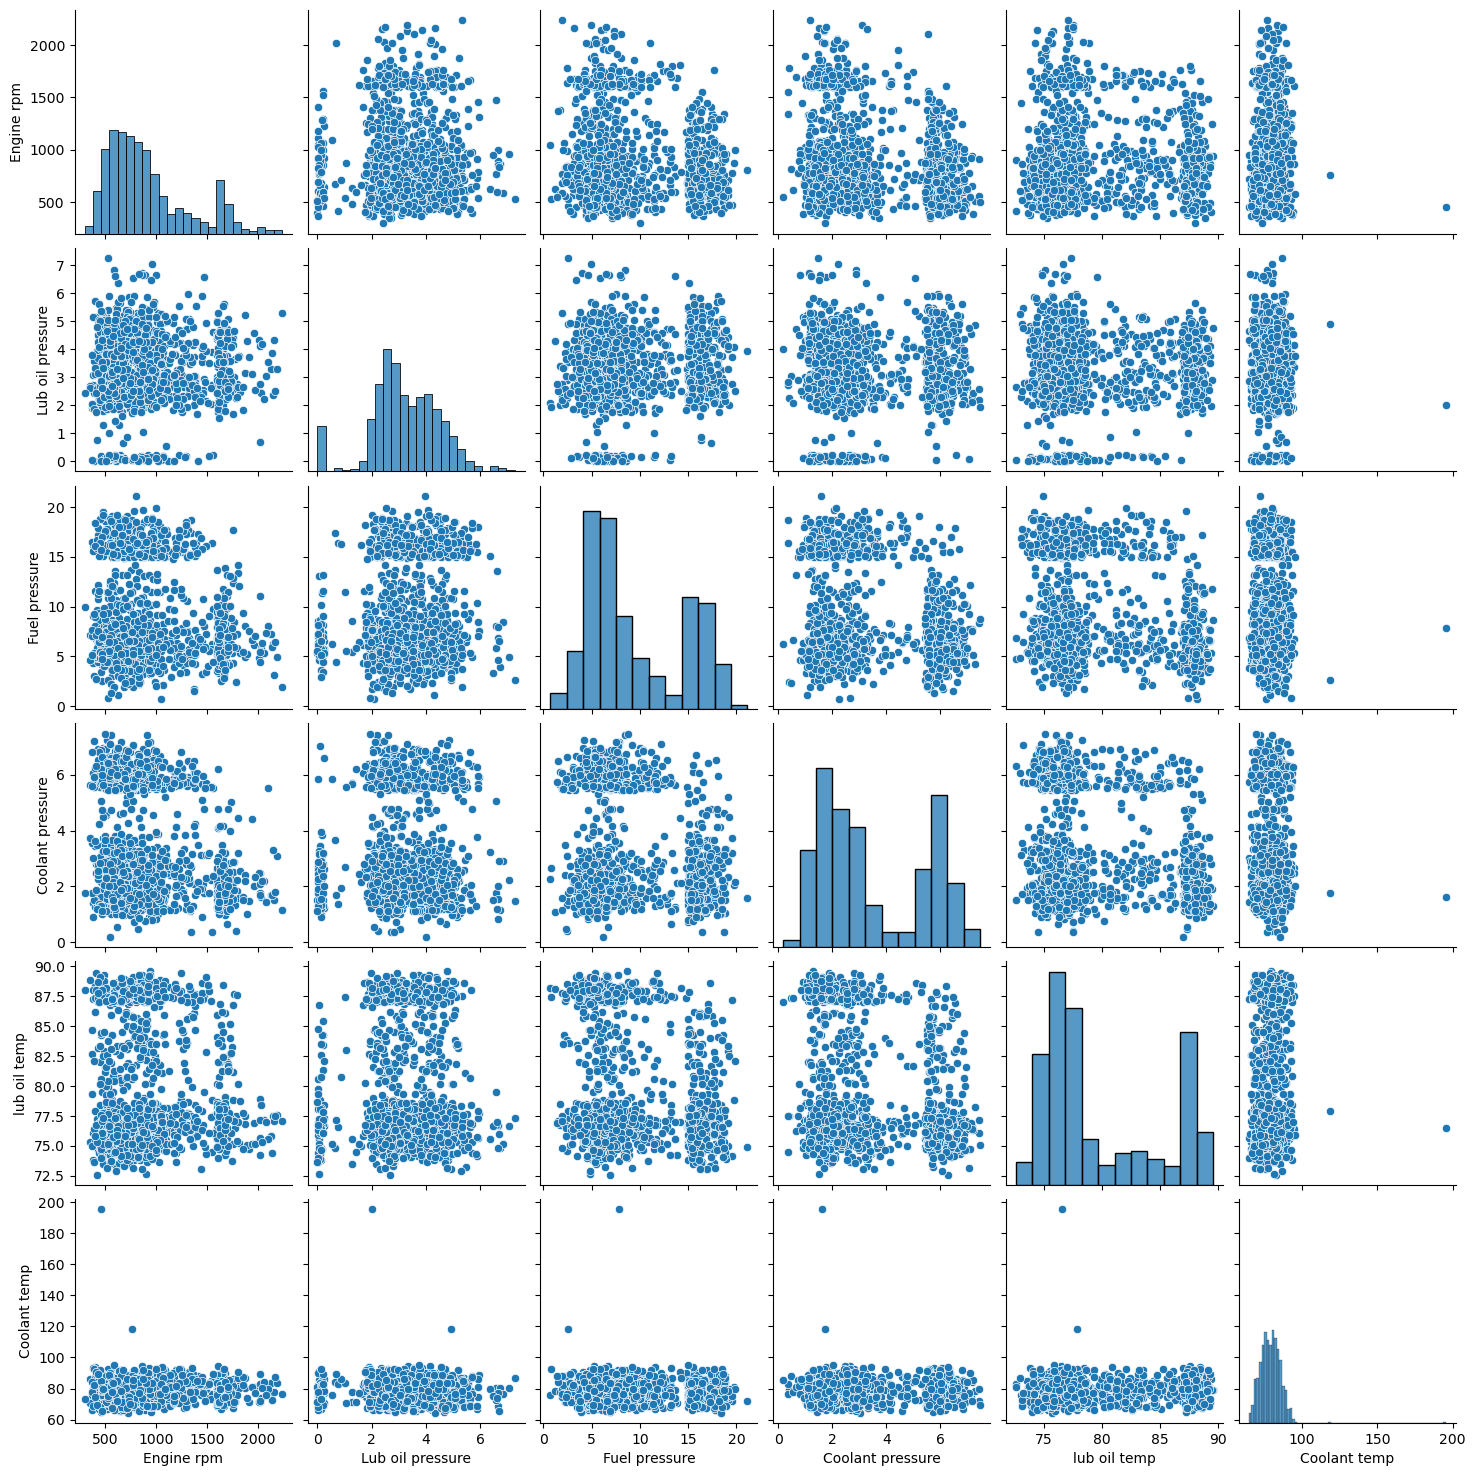

In [20]:
# Investigating relationships between outliers

sns.pairplot(df_z_out)
print('Pair Plot of the Z > 3 DataFrame')
plt.show()

From the pair plot we can see a little structure taking form between variables when looking at the z>3 values, indcating existence of some underlying relationships.

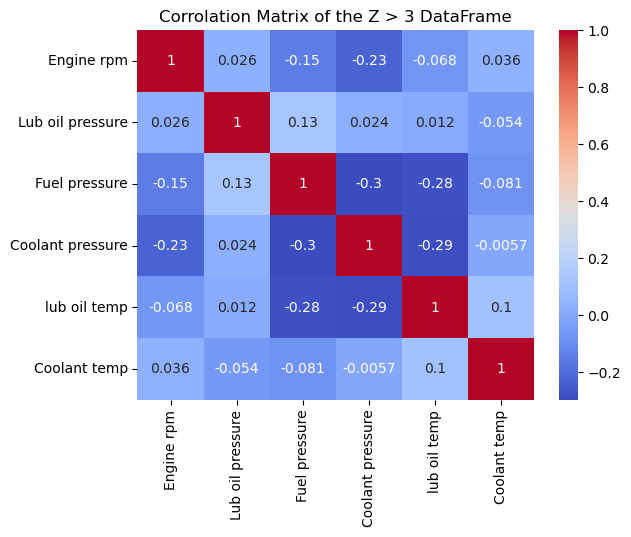

In [21]:
corr_out = df_z_out.corr()
sns.heatmap(corr_out, cmap='coolwarm', annot=True)
plt.title('Corrolation Matrix of the Z > 3 DataFrame')
plt.show()


The corrolation matrix of z>3 observations indicates some relevent corrolation between variables, noteabley:

- rpm with coolant pressure
- fuel pressure with coolant pressure
- fuel pressure with oil temp
- coolant pressure with oil temp


all of which are inversely corrolated.

## Exploratory Data Analysis with Outliers Removed

Pair Plot of the Z < 3 DataFrame


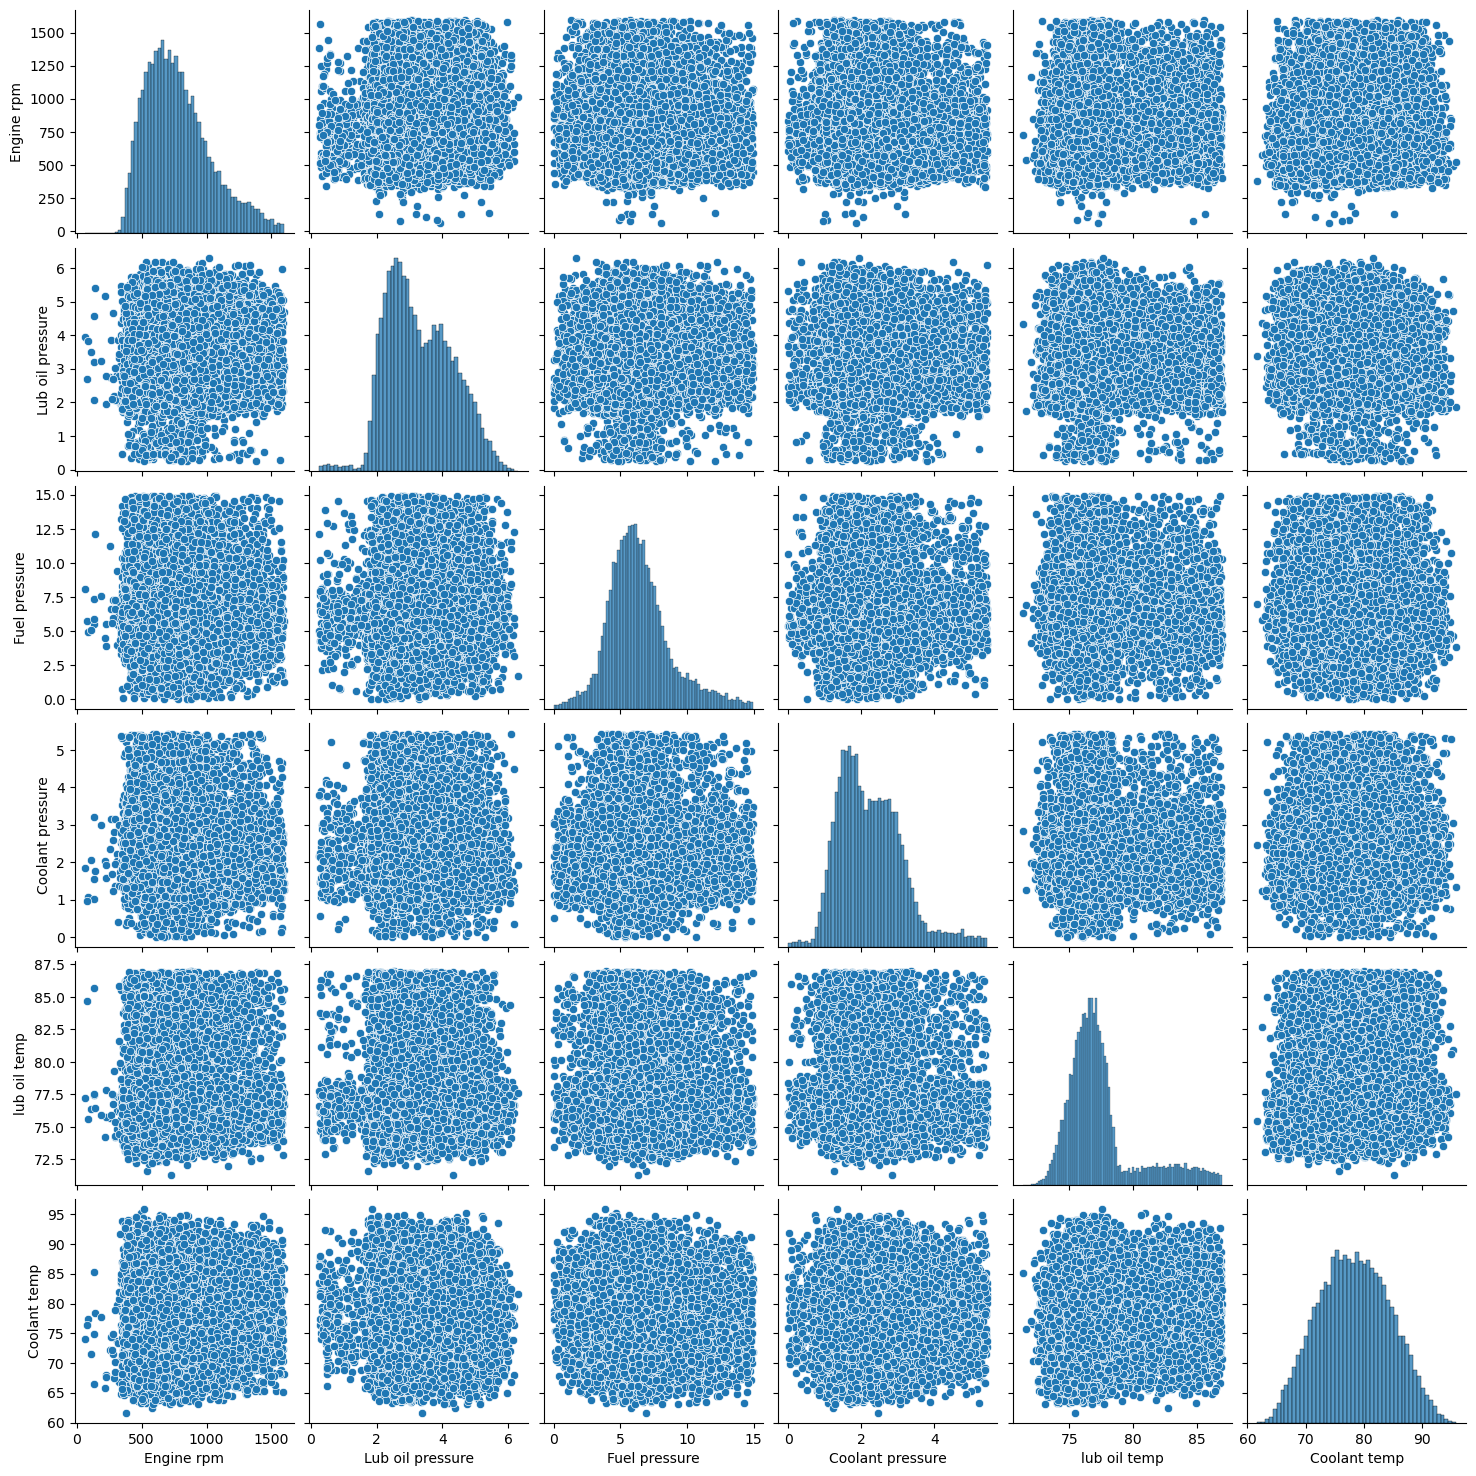

In [37]:
sns.pairplot(df_z_in)
print('Pair Plot of the Z < 3 DataFrame')
plt.show()

The analysis of the observations within 3 standard devations of the mean reveals distributions tending closer to a normal distribution, and pair plots indicating either large amounts of noise, or possibly non-linear relationships.

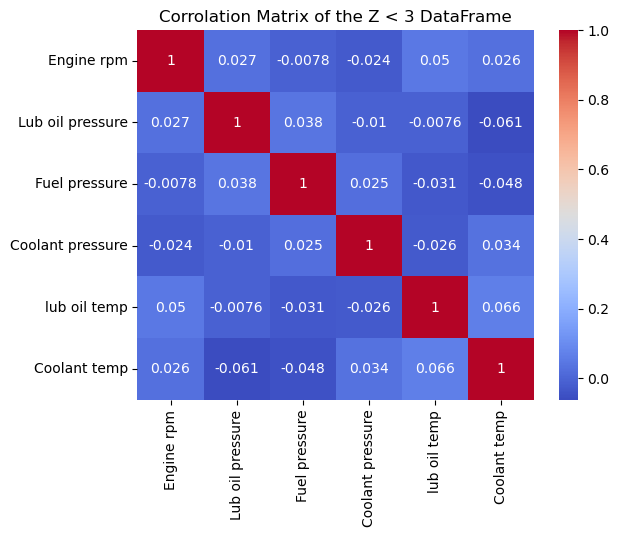

In [38]:
corr_in = df_z_in.corr()
sns.heatmap(corr_in, cmap='coolwarm', annot=True)
plt.title('Corrolation Matrix of the Z < 3 DataFrame')
plt.show()

The corrolation matrix of the Z<3 data, shows no corrolation between variables.

In [39]:
# Renaming columns for robust ML processing
df = df.rename(columns={
    'Engine rpm': 'engine_rpm',
    'Lub oil pressure': 'oil_pressure',
    'Fuel pressure': 'fuel_pressure',
    'Coolant pressure': 'coolant_pressure',
    'lub oil temp': 'oil_temp',
    'Coolant temp': 'coolant_temp'
})

## Interquartile Range Analysis

In [40]:
# Interquartile Range
df = df.copy()

# Filter 5 percent of the tails in any two columns

# Create a dataframe to track extreme values in each row
extreme_count = pd.DataFrame(0, index=df.index, columns=['count'])

# Loop through columns and score each row 
for col in df.columns:
  p025, p975 = df[col].quantile([0.025,0.975])
  df_inner_95 = df[df[col].between(p025,p975)]
  is_extreme = ~df_inner_95[col].between(p025,p975)
  extreme_count['count'] += is_extreme.astype(int)

# Keep rows with fewer than 2 extreme values
df_inner_95 = df_inner_95[extreme_count < 2]

(df_inner_95.shape)
print(f'{100 * (1 - df_inner_95.shape[0]/rows_number)}%')

5.006398771435883%


In [41]:
# Filter using inter quartile range method

# Create a dataframe to track extreme values in each row
df_iqr = df.copy()
df_iqr['count'] = 0

# Loop through each column and score each row
for col in df.columns:
  # Calculate the upper and lower limits.
  q1, q3 = df_iqr[col].quantile([0.25,0.75])
  iqr = q3 - q1
  lower = q1-1.5*iqr
  upper = q3+1.5*iqr
  # Create boolian mask and apply
  mask_outside = ~df_iqr[col].between(lower, upper)
  df_iqr.loc[mask_outside, 'count'] = df_iqr.loc[mask_outside, 'count'] + 1

# Create a dataframe to display IQR results, number of outliers for given boundry
iqr_results = pd.DataFrame(columns=['outlier_boundry', 'outlier_count', 'percentage_of_data'])
for n in range(len(df.columns)):
  mask_outliers = df_iqr['count'] >= n
  outliers = df_iqr.loc[mask_outliers].shape[0]
  perc = 100*outliers/rows_number
  iqr_results.loc[n] = [n, outliers, perc]

iqr_results


outlier_boundry  outlier_count  percentage_of_data
0              0.0        19535.0          100.000000
1              1.0         4636.0           23.731764
2              2.0          422.0            2.160225
3              3.0           11.0            0.056309
4              4.0            0.0            0.000000
5              5.0            0.0            0.000000

We use statistical methods to effectively remove values from the outer quartiles of data. 
The IQR method applyied allows us to filter outliers based on the number of outliers in a given row.
With 2 as the boundy, we filter 2.16% of data.

## Data Scaling

In [42]:
# Create column labels
df_columns = df.columns
print(df_columns)

#Cheack the head of df
print(df.head())

Index(['engine_rpm', 'oil_pressure', 'fuel_pressure', 'coolant_pressure',
       'oil_temp', 'coolant_temp'],
      dtype='object')
   engine_rpm  oil_pressure  fuel_pressure  coolant_pressure   oil_temp  \
0         682      2.391656       4.617196          2.848982  76.272417   
1         605      5.466877       6.424361          5.727520  73.222679   
2         658      3.434232       3.680896          1.678708  88.089916   
3         749      2.094656       7.120927          1.639670  77.661625   
4         676      3.538228       5.956472          3.225336  75.226352   

   coolant_temp  
0     69.884609  
1     74.907314  
2     78.704806  
3     82.386700  
4     67.153220  


In [ ]:
# Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df = df.copy()

# Create numpy array of observations and scale using standardisation
X = df.values
X_scaled = scaler.fit_transform(X)

# Ceate a library of X related data
X_lib = {
  'X': [X, X_scaled, df_columns], 
}

# Create a library of OCSVM results related data
ocsvm_results = {}

# Check the head of the scaled data
print(X_lib['X'][1][:5])

[[-0.40821185 -0.89281929 -0.73830371  0.49559555 -0.44070891 -1.37641176]
 [-0.69595007  2.11733175 -0.08375911  3.27315389 -1.42104681 -0.56715821]
 [-0.49789649  0.12769669 -1.07742594 -0.63362488  3.35802552  0.04469003]
 [-0.15784222 -1.18353441  0.16853314 -0.67129327  0.00585205  0.6379134 ]
 [-0.43063301  0.22949196 -0.25322555  0.85874712 -0.77696641 -1.81649055]]


## One-Class Support Vector Machine

In [43]:
# Create dictionary of parameters to try with the OCSVM

param_grid_OCSVM = [
    {'kernel': 'rbf', 'gamma': 0.02, 'nu': 0.02},
    {'kernel': 'rbf', 'gamma': 0.03, 'nu': 0.02},
    {'kernel': 'rbf', 'gamma': 0.04, 'nu': 0.02},
    {'kernel': 'rbf', 'gamma': 0.05, 'nu': 0.02},
    {'kernel': 'rbf', 'gamma': 0.02, 'nu': 0.03},
    {'kernel': 'rbf', 'gamma': 0.03, 'nu': 0.03},
    {'kernel': 'rbf', 'gamma': 0.04, 'nu': 0.03},
    {'kernel': 'rbf', 'gamma': 0.05, 'nu': 0.03},
    {'kernel': 'rbf', 'gamma': 0.02, 'nu': 0.04},
    {'kernel': 'rbf', 'gamma': 0.03, 'nu': 0.04},
    {'kernel': 'rbf', 'gamma': 0.04, 'nu': 0.04},
    {'kernel': 'rbf', 'gamma': 0.05, 'nu': 0.04},
    {'kernel': 'rbf', 'gamma': 0.02, 'nu': 0.05},
    {'kernel': 'rbf', 'gamma': 0.03, 'nu': 0.05},
    {'kernel': 'rbf', 'gamma': 0.04, 'nu': 0.05},
    {'kernel': 'rbf', 'gamma': 0.05, 'nu': 0.05}
]

In [44]:
# One Class Support Vector Machine
from sklearn.svm import OneClassSVM

# Unpack the X data library
for key, x in X_lib.items():
    '''
    The scaled X data is x[1]
    The column labels are x[2]
    '''
    
    # Create a results list for each run
    ocsvm_results[key] = []
    
    # Loop through the parameter library
    for param in param_grid_OCSVM:
        
        # Create the model and fit to the scaled data
        model = OneClassSVM(**param)
        model.fit(x[1])

        # Use the model to predict outliers on the scaled data
        # Tracking predictions and scores
        y_pred = model.predict(x[1])
        scores = model.decision_function(x[1])
        print(y_pred)
        
        # Create a dataframe of the scaled data
        df_anom = pd.DataFrame(x[1], columns = x[2])
        
        # Add prediciton value to the dataframe
        df_anom['anomaly'] = y_pred
        
        # Create a dataframe of only anomulus data
        anomalies = df_anom[df_anom['anomaly'] == -1]
        
        # Create a seperation metric to evaluate each model
        sep = (
            scores[y_pred ==1].mean() - scores[y_pred == -1].mean()
            )/ scores.std()

        # Display results and evaluation of each model
        print(
            f'[OCSVM] {key} | {param} → '
            f'{anomalies.shape[0]} anomalies '
            f'({anomalies.shape[0] / rows_number:.2%}) '
            f'separation {sep:.2f}'
        )
        
        # Append the results list to the results library
        ocsvm_results[key].append({
            'params': param,
            'y_pred': y_pred,
            'scores': scores,
            'df': df_anom,
            'anomalies': anomalies,
            'separation': sep
        })
    

[ 1 -1  1 ...  1  1  1]
[OCSVM] X | {'kernel': 'rbf', 'gamma': 0.02, 'nu': 0.02} → 391 anomalies (2.00%) separation 3.19
[ 1 -1  1 ...  1  1  1]
[OCSVM] X | {'kernel': 'rbf', 'gamma': 0.03, 'nu': 0.02} → 389 anomalies (1.99%) separation 3.10
[ 1 -1  1 ...  1  1  1]
[OCSVM] X | {'kernel': 'rbf', 'gamma': 0.04, 'nu': 0.02} → 391 anomalies (2.00%) separation 3.02
[ 1 -1  1 ...  1  1  1]
[OCSVM] X | {'kernel': 'rbf', 'gamma': 0.05, 'nu': 0.02} → 395 anomalies (2.02%) separation 2.96
[ 1 -1  1 ...  1  1  1]
[OCSVM] X | {'kernel': 'rbf', 'gamma': 0.02, 'nu': 0.03} → 584 anomalies (2.99%) separation 2.98
[ 1 -1  1 ...  1  1  1]
[OCSVM] X | {'kernel': 'rbf', 'gamma': 0.03, 'nu': 0.03} → 587 anomalies (3.00%) separation 2.90
[ 1 -1  1 ...  1  1  1]
[OCSVM] X | {'kernel': 'rbf', 'gamma': 0.04, 'nu': 0.03} → 586 anomalies (3.00%) separation 2.84
[ 1 -1  1 ...  1  1  1]
[OCSVM] X | {'kernel': 'rbf', 'gamma': 0.05, 'nu': 0.03} → 583 anomalies (2.98%) separation 2.80
[ 1 -1  1 ...  1  1  1]
[OCSVM] 

By comparing the seperation distance between mean score of normal and anomalous data, we see that the configuration 'gamma': 0.02, 'nu': 0.02 has the highest separation of 3.19, predicting 391 anomalies (2.00%).


## Dimensionality Reduction and Visulisation

In [46]:
from sklearn.decomposition import PCA

# Defining a function that creates PCA Plots of given data
def plot_pca_anomalies(
    X_data,
    X_key,
    anomaly_labels,
    decision_scores=None,
    ax=None,
    point_size=8,
    alpha=0.3,
    add_colourbar=False,
):
    if ax is None:
        ax = plt.gca()

    # Call the PCA method with a random state
    pca = PCA(n_components=2, random_state=42)
    
    # Tranform the unscaled X data
    X_pca = pca.fit_transform(X_data)

    # Create dicision score plot if given scores
    if decision_scores is not None:
        sc = ax.scatter(
            X_pca[:, 0],
            X_pca[:, 1],
            c=decision_scores,
            cmap='viridis',
            s=point_size,
            alpha=0.7,
        )
        # Add a colour bar to analyise decision gradient
        if add_colourbar:
            cbar = plt.colorbar(sc, ax=ax, fraction=0.046, pad=0.04)
            cbar.set_label('OCSVM decision_function score')
    
    # Create plot of the X scaled data, colouring normal and outlier data points
    else:
        inlier = anomaly_labels == 1
        outlier = anomaly_labels == -1

        ax.scatter(
            X_pca[inlier, 0],
            X_pca[inlier, 1],
            s=point_size,
            alpha=alpha,
            label='Normal (+1)',
            zorder=1
        )
        ax.scatter(
            X_pca[outlier, 0],
            X_pca[outlier, 1],
            s=point_size,
            alpha=alpha,
            marker='x',
            color='red',
            label='Anomaly (-1)',
            zorder=2
        )
        ax.legend(fontsize=8)

    # Set axies labels and chart title
    ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% var)')
    ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% var)')
    ax.set_title(f'PCA: {X_key}')
    ax.grid(alpha=0.3)

    return pca, X_pca

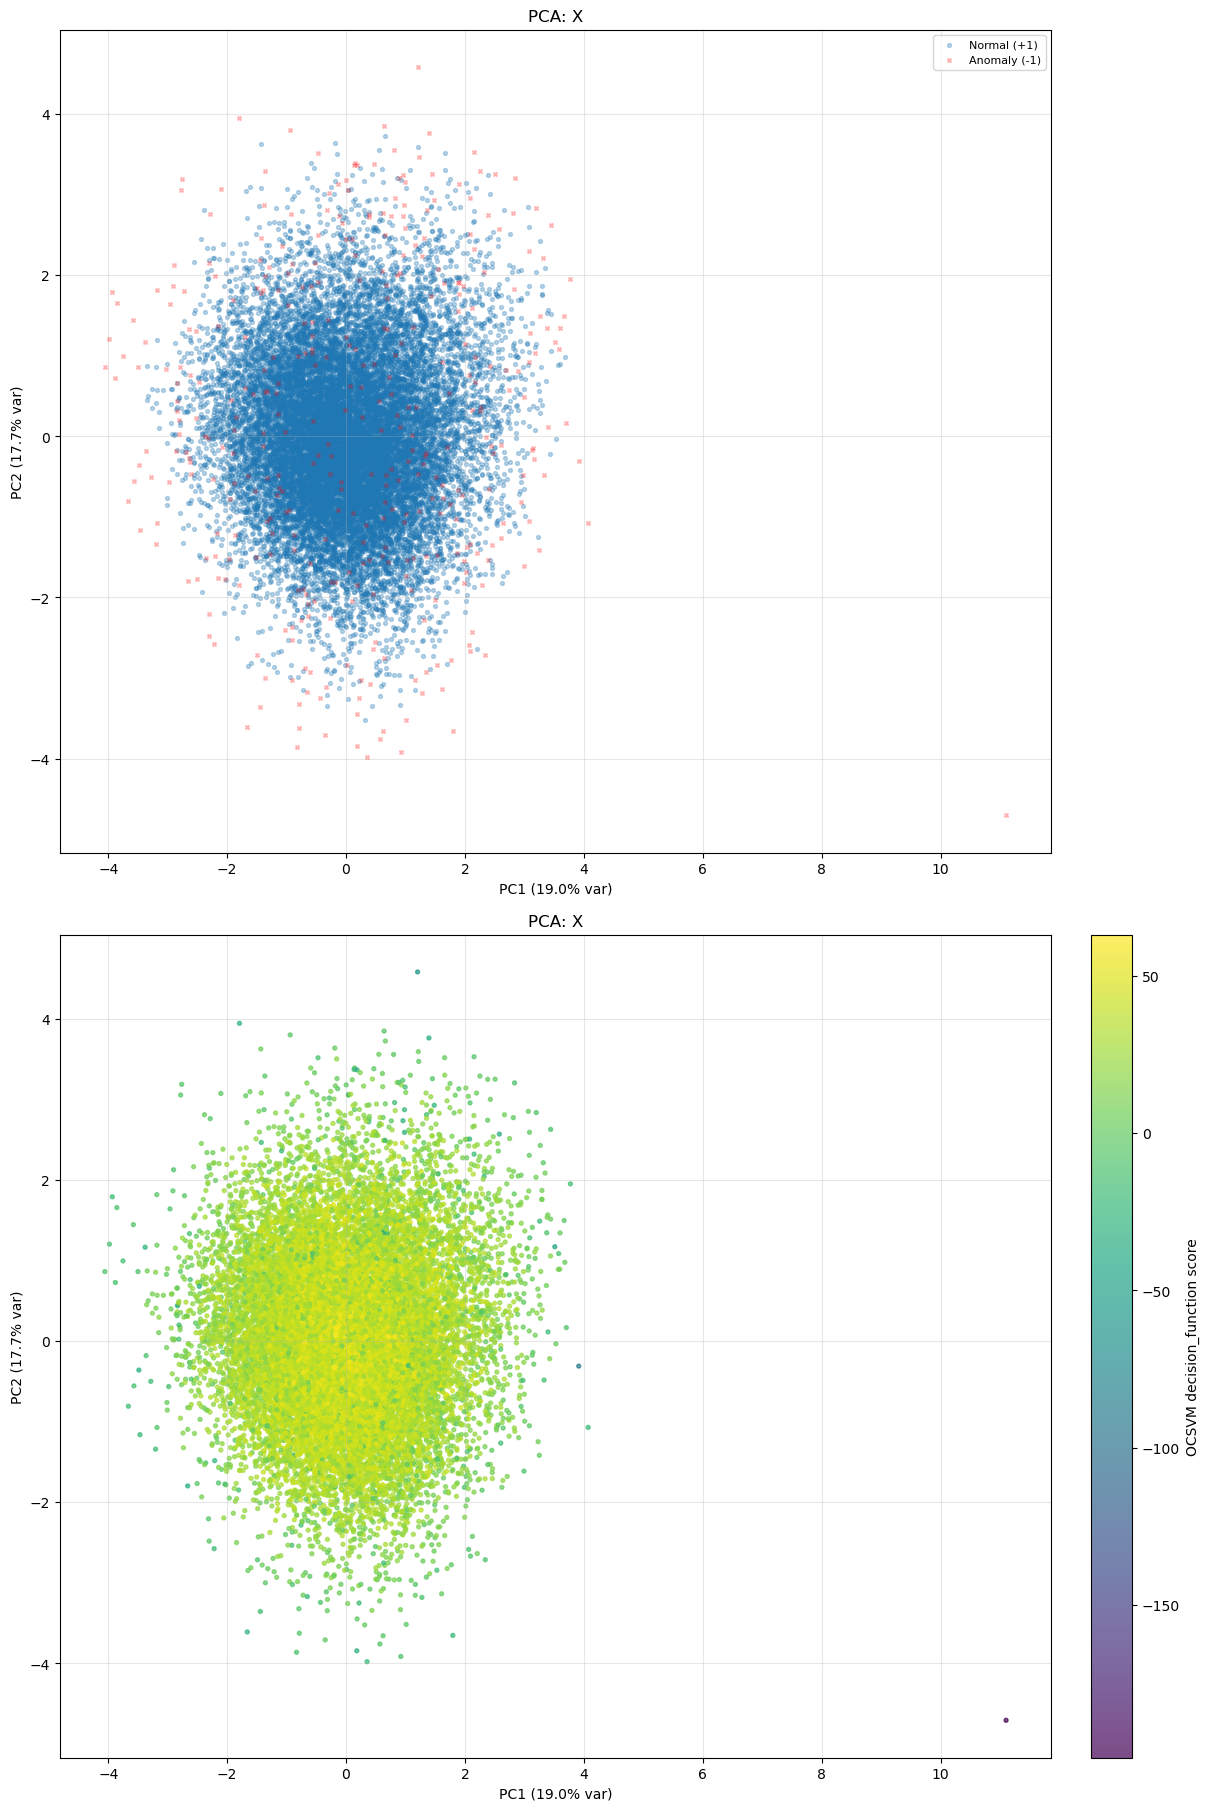

In [49]:
# Create a figure and axes for subplots
fig, axes = plt.subplots(2,1, figsize=(12,18), constrained_layout=True)

# Unpack the X and y libraries then transform and plot 
for (key, x), (_, y) in zip(X_lib.items(), ocsvm_results.items()):
    '''X scaled data = x[1]'''
    labels = y[0]['y_pred']
    scores = y[0]['scores']

    # Row 1: anomaly labels
    plot_pca_anomalies(
        X_data=x[1],
        X_key=key,
        anomaly_labels=labels,
        ax=axes[0]
    )

    # Row 2: decision scores
    plot_pca_anomalies(
        X_data=x[1],
        X_key=key,
        anomaly_labels=labels,
        decision_scores=scores,
        ax=axes[1],
        add_colourbar=True
    )

    plt.show()

In the first plot, there seems to be no distinction between anolmalies and normal data points. The anomalies are peppered throughout the plot with no boundry or geomentry visible.

The second plot visulises the dision boundry of the model. Here we can see the colour gradient is not smooth and the extremes (dark coloured points) are scattered throughout the plot.

## Isolation Forest Method

In [50]:
# Check the head of the unscaled data
print(X_lib['X'][0])

[[ 682.            2.39165593    4.61719583    2.84898211   76.27241676
    69.88460898]
 [ 605.            5.46687695    6.42436074    5.72752018   73.22267936
    74.90731428]
 [ 658.            3.43423224    3.68089632    1.67870822   88.08991608
    78.70480574]
 ...
 [ 616.            3.31004843    3.78769277    6.00103089   75.88980991
    72.22000922]
 [1163.            2.73172559    3.70359526    2.95168439   76.78462566
    81.40008837]
 [ 695.            2.51508914    6.3554619     2.68856724   77.55591819
    71.15608059]]


In [51]:
# Create a library of parameters to try with the isolation forest

param_grid = [
    {'contamination': 0.02, 'n_estimators': 300, 'max_samples': 256, 'max_features': 1.0},
    {'contamination': 0.03, 'n_estimators': 300, 'max_samples': 256, 'max_features': 1.0},
    {'contamination': 0.04, 'n_estimators': 300, 'max_samples': 256, 'max_features': 1.0},
    {'contamination': 0.05, 'n_estimators': 300, 'max_samples': 256, 'max_features': 1.0},
    {'contamination': 0.02, 'n_estimators': 500, 'max_samples': 512, 'max_features': 1.0},
    {'contamination': 0.03, 'n_estimators': 500, 'max_samples': 512, 'max_features': 1.0},
    {'contamination': 0.04, 'n_estimators': 500, 'max_samples': 512, 'max_features': 1.0},
    {'contamination': 0.05, 'n_estimators': 500, 'max_samples': 512, 'max_features': 1.0},
]

In [55]:
from sklearn.ensemble import IsolationForest

# Create a library for the ISF results
tree_results = {}

# Unpack the X library
for key, x in X_lib.items():
    '''
    The X unscaled data is x[0]
    The column labels are x[2]
    '''

    # Create a list of results for each run
    tree_results[key] = []

    # Loop through the parameter library
    for param in param_grid:
        
        # Call the Isolation Forest method and fit to the unscaled data
        iso_forest = IsolationForest(**param, random_state=42)
        iso_forest.fit(x[0])

        # Use the trained model to predicit anomalies, track scores
        y_pred = iso_forest.predict(x[0])
        scores = iso_forest.decision_function(x[0])

        # Create a dataframe of the unscaled X data and add outliers and scores
        df_out = pd.DataFrame(x[0], columns=x[2])
        df_out['anomaly'] = y_pred
        df_out['score'] = scores
        
        # Create a dataframe fo the anomalous data
        anomalies = df_out[df_out['anomaly'] == -1]
        
        # Create a seperation metric to evaluate each model
        sep = (
            scores[y_pred ==1].mean() - scores[y_pred == -1].mean()
        ) / scores.std()

        # Print the results of each run
        print(
            f'[IF] {key} | {param} → '
            f'{anomalies.shape[0]} anomalies '
            f'({anomalies.shape[0] / rows_number:.2%})'
            f'separation {sep:.2f}'
        )
        
        # Append the results list to the results library
        tree_results[key].append({
            'params': param,
            'y_pred': y_pred,
            'scores': scores,
            'df': df_out,
            'anomalies': anomalies,
            'separation': sep
        })

[IF] X | {'contamination': 0.02, 'n_estimators': 300, 'max_samples': 256, 'max_features': 1.0} → 391 anomalies (2.00%)separation 3.00
[IF] X | {'contamination': 0.03, 'n_estimators': 300, 'max_samples': 256, 'max_features': 1.0} → 587 anomalies (3.00%)separation 2.82
[IF] X | {'contamination': 0.04, 'n_estimators': 300, 'max_samples': 256, 'max_features': 1.0} → 782 anomalies (4.00%)separation 2.70
[IF] X | {'contamination': 0.05, 'n_estimators': 300, 'max_samples': 256, 'max_features': 1.0} → 977 anomalies (5.00%)separation 2.60
[IF] X | {'contamination': 0.02, 'n_estimators': 500, 'max_samples': 512, 'max_features': 1.0} → 391 anomalies (2.00%)separation 3.10
[IF] X | {'contamination': 0.03, 'n_estimators': 500, 'max_samples': 512, 'max_features': 1.0} → 587 anomalies (3.00%)separation 2.91
[IF] X | {'contamination': 0.04, 'n_estimators': 500, 'max_samples': 512, 'max_features': 1.0} → 782 anomalies (4.00%)separation 2.77
[IF] X | {'contamination': 0.05, 'n_estimators': 500, 'max_sam

If we examine the mean seperation distance of each configuration and each feature set, the combonation with the highest separation is confgiuration 5 with mean separation 3.10. This set of parameters detects 2% anomalies, which falls between the suggested bounds of 1-5%

## Next Steps

So far we have managed to set up some methods to make initial anomolie detection using the raw data. However the PCA plot indicated there is little structure to our phase space. PCA is a linear dimensionality-reduction technique that projects high-dimensional data onto orthogonal axes (principal components) that maximise variance and does not preserve non-linear neighbourhood structure.

Uniform Manifold Approximation and Projection (UMAP) is a non-linear dimensionality-reduction technique, it constructs a weighted graph that preserves local neighbourhood structure in the original feature space and then optimises a low-dimensional embedding that maintains these relationships.

## UMAP DR and Visulisation

In [56]:
!pip install umap-learn

In [ ]:
import umap
import numpy as np

# Define a function to perform UMAP method and plot predicitons and scores
def plot_umap_anomalies(
    X_scaled,
    y_pred=None,
    decision_scores=None,
    n_neighbors=25,
    min_dist=0.10,
    metric='euclidean',
    random_state=42,
    title='UMAP projection',
    alpha=0.65,
    point_size=8,
    ax=None,
    add_colourbar=False,
):
    if ax is None:
        ax = plt.gca()

    # Call the UMAP method 
    reducer = umap.UMAP(
        n_components=2,
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        metric=metric,
        random_state=random_state,
    )
    # Transfrom the scaled data
    emb = reducer.fit_transform(X_scaled)

    # Create a plot of the decision scores if given
    if decision_scores is not None:
        decision_scores = np.asarray(decision_scores)
        sc = ax.scatter(
            emb[:, 0], emb[:, 1],
            c=decision_scores,
            s=point_size,
            alpha=alpha,
        )
        # Add colour bar 
        if add_colourbar:
            cbar = plt.colorbar(sc, ax=ax, fraction=0.046, pad=0.04)
            cbar.set_label('decision_function score')

    # Create a plot of the data, colouring the normal and anomalous points
    else:
        if y_pred is None:
            raise ValueError('Provide either y_pred or decision_scores for colouring.')

        y_pred = np.asarray(y_pred)
        inlier = (y_pred == 1)
        outlier = (y_pred == -1)

        ax.scatter(
            emb[inlier, 0], emb[inlier, 1],
            s=point_size,
            alpha=alpha,
            label='Normal (+1)',
        )
        ax.scatter(
            emb[outlier, 0], emb[outlier, 1],
            s=point_size * 1.5,
            alpha=min(1.0, alpha + 0.15),
            marker='x',
            label='Anomaly (-1)',
        )
        ax.legend(loc='best', fontsize=8)

    # Set chart axes lables
    ax.set_title(title)
    ax.set_xlabel('UMAP-1')
    ax.set_ylabel('UMAP-2')
    return emb

/opt/homebrew/Caskroom/miniforge/base/envs/base_ds/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### UMAP Plot - OCSVM

/opt/homebrew/Caskroom/miniforge/base/envs/base_ds/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/opt/homebrew/Caskroom/miniforge/base/envs/base_ds/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


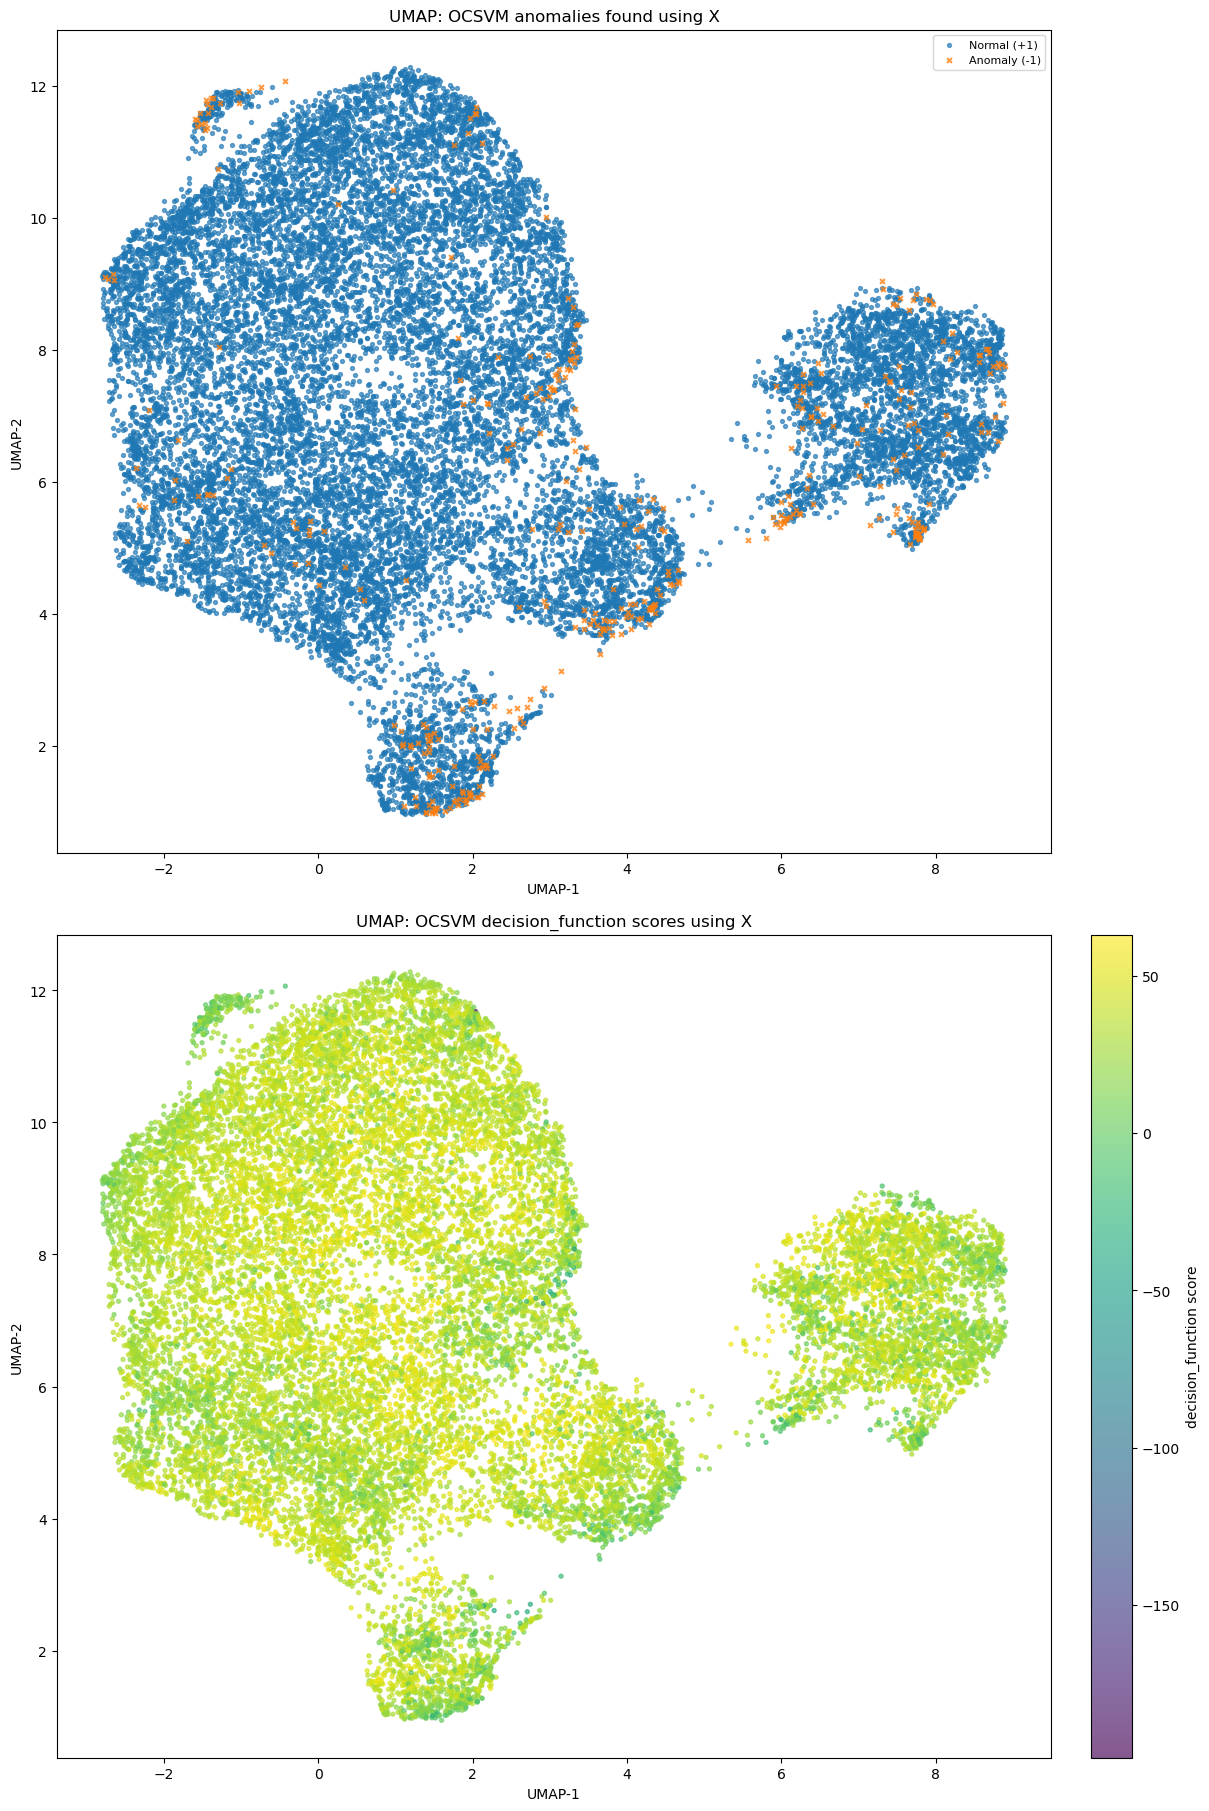

In [58]:
# Create a figure and axes with subplot
fig, axes = plt.subplots(2, 1, figsize=(12, 18), constrained_layout=True)

# Unpack the X and y libraries for OCSVM
for ((key, x), (_, y)) in zip(X_lib.items(), ocsvm_results.items()):

    '''X scaled data = x[1]'''
    y_pred = y[0]['y_pred']
    scores = y[0]['scores']

    plot_umap_anomalies(
        x[1], y_pred=y_pred,
        title='UMAP: OCSVM anomalies found using ' + key,
        ax=axes[0]
    )

    plot_umap_anomalies(
        x[1], decision_scores=scores,
        title='UMAP: OCSVM decision_function scores using ' + key,
        ax=axes[1],
        add_colourbar=True
    )

plt.show()

The UMAP plot displays more structure than our previous PCA plot, indicating there may be non linear relationships between data. There is still anomolies detected within the main body/density of data but far less than with the PCA plot. Aditionally the boundy plot has a smoother gradient, however still quite noisy.

### UMAP Plot - Isolation Forest

In [59]:
for key, y in tree_results.items():
  print(y[4].keys())

dict_keys(['params', 'y_pred', 'scores', 'df', 'anomalies', 'separation'])


/opt/homebrew/Caskroom/miniforge/base/envs/base_ds/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/base_ds/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


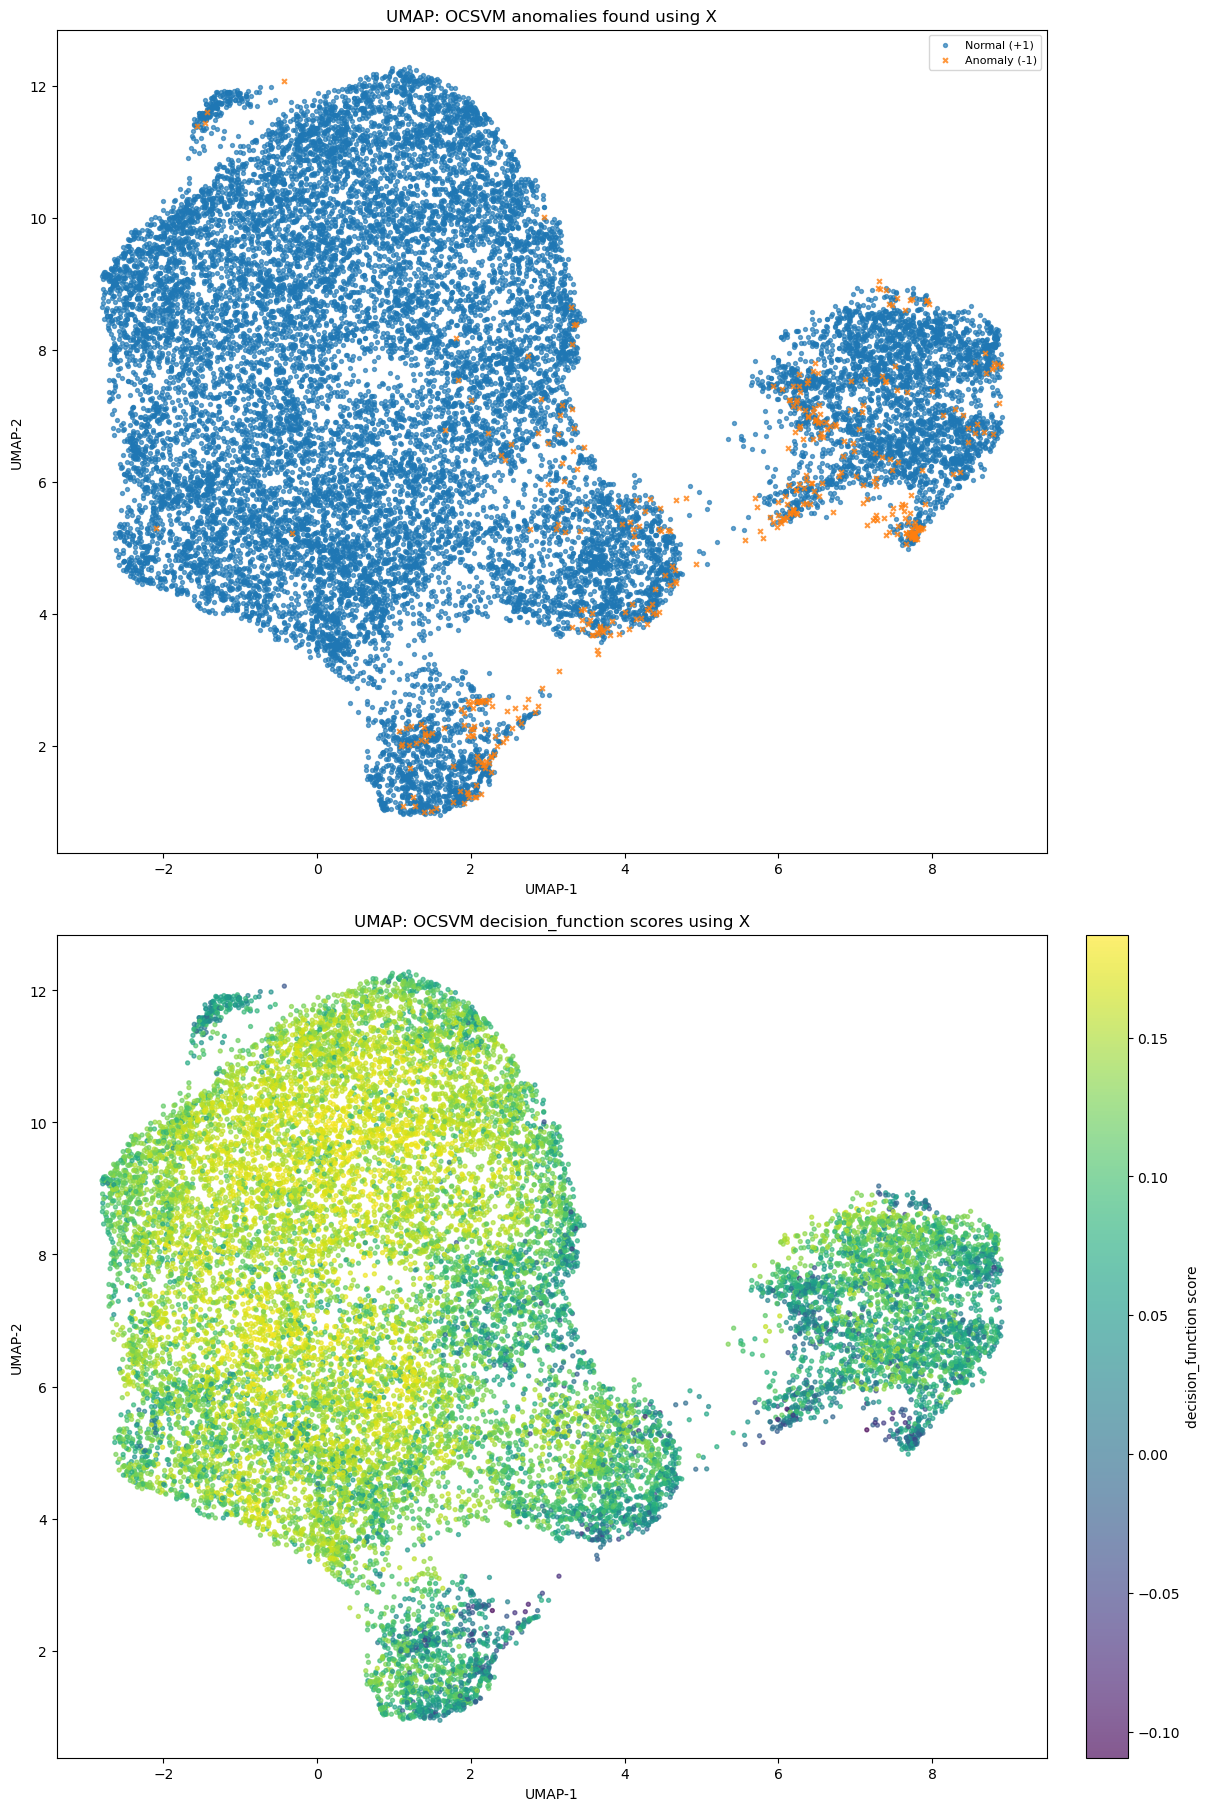

In [61]:
# Create a figure and axes with subplot
fig, axes = plt.subplots(2, 1, figsize=(12, 18), constrained_layout=True)

# Unpack the X and y data for the isolaton forest results
for ((key, x), (_, y)) in zip(X_lib.items(), tree_results.items()):

    '''X scaled data is x[1], we ust used scaled data for the UMAP plot'''
    y_pred = y[4]['y_pred']
    scores = y[4]['scores']

    plot_umap_anomalies(
        x[1], y_pred=y_pred,
        title='UMAP: OCSVM anomalies found using ' + key,
        ax=axes[0]
    )

    plot_umap_anomalies(
        x[1], decision_scores=scores,
        title='UMAP: OCSVM decision_function scores using ' + key,
        ax=axes[1],
        add_colourbar=True
    )

plt.show()

The UMAP plot indicates our tree model with configuration 5 is separating normal observations and anomalies well, with most anomaliers in the less dense regions, edges, bridges and tips. Additionally the boundy plot is much cleaner, with smoother gradient, darkest colours concentrated at geometrical extremes and no chaotic speckling in dense regions.

## Further Feature Engineering

My next step would be to revisit feature engineering, creating some interaction variables and even search for some non linear relationships between features. This can be done with the Symbolic Regression algorythm.

First I will create interaction features using my knowledge of physics, starting with ratios of related variables.
Then implement the Symbolic Regression Algorythm for discover relationships between variables. Calculate VIF for all variables and use this to reduce my features. After this process I would procceed again with data scaling and model creation.

# Reflect

Write a brief paragraph highlighting your process and the rationale to showcase critical thinking and problem-solving.

> Select the pen from the toolbar to add your entry.

### Reference:
Devabrat, M., 2022. Predictive Maintenance on Ship's Main Engine using AI. Available at: https://dx.doi.org/10.21227/g3za-v415. [Accessed 5 March 2024]